# Pandora: Tutorial

In [1]:
%matplotlib inline
import pandoramoon as pandora
import numpy as np
import matplotlib.pyplot as plt

Call Pandora and get model with these parameters:

In [2]:
params = pandora.model_params()
R_sun = 696_342_000
params.R_star = R_sun  # [m]
params.u1 = 0.4089
params.u2 = 0.2556

Planet parameters:

In [3]:
params.per_bary = 365.25  # [days]
params.a_bary = 215  # [R_star]
params.r_planet = 0.1 # [R_star]
params.b_bary = 0.3   # [0..1]
params.t0_bary = 11  # [days]
params.t0_bary_offset = 0  # [days]
params.M_planet = 1.8986e+27  # [kg]
params.w_bary = 20  # [deg]
params.ecc_bary = 0.2  # [0..1]  

Moon parameters:

In [4]:
params.r_moon = 0.03526 # [R_star]
params.per_moon = 0.3 # [days]
params.tau_moon = 0.07  # [0..1]
params.Omega_moon = 0  # [0..180]
params.i_moon = 80  # [0..180]
params.e_moon = 0.9  # [0..1]
params.w_moon = 20  # [deg]
params.M_moon = 0.05395 * params.M_planet  # [0..1]

Other model parameters

In [5]:
params.epochs = 3  # [int]
params.epoch_duration = 0.6  # [days]
params.cadences_per_day = 250  # [int]
params.epoch_distance = 365.26   # [days]
params.supersampling_factor = 1  # [int]
params.occult_small_threshold = 0.1  # [0..1]
params.hill_sphere_threshold = 1.2

Obtain time grid

In [6]:
time = pandora.time(params).grid()

Define model

In [7]:
model = pandora.moon_model(params)

Evaluate model for each point in time grid

In [8]:
flux_total, flux_planet, flux_moon = model.light_curve(time)

Plot synthetic data with and without noise

Create noise and merge with flux

In [9]:
noise_level = 100e-6  # Gaussian noise to be added to the generated data
noise = np.random.normal(0, noise_level, len(time))
testdata = noise + flux_total
yerr = np.full(len(testdata), noise_level)

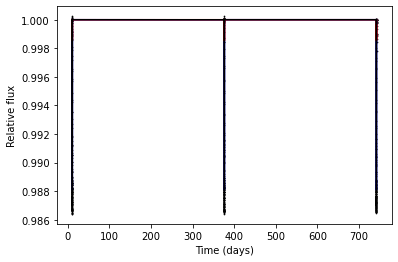

In [11]:
plt.plot(time, flux_planet, color="blue")
plt.plot(time, flux_moon, color="red")
plt.plot(time, flux_total, color="black")
plt.scatter(time, testdata, color="black", s=0.5)
plt.xlabel("Time (days)")
plt.ylabel("Relative flux")
plt.show()

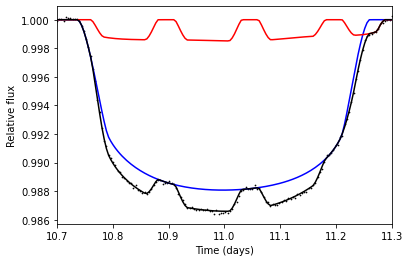

In [16]:
plt.plot(time, flux_planet, color="blue")
plt.plot(time, flux_moon, color="red")
plt.plot(time, flux_total, color="black")
plt.scatter(time, testdata, color="black", s=0.5)
plt.xlabel("Time (days)")
plt.ylabel("Relative flux")
plt.xlim(min(time), min(time)+params.epoch_duration)
plt.show()